In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Palaeo-Plotz Function

In [2]:
def stacked_axes(fig, n, squeeze=0.9, proportions=None, topaxis=False,  border=(.1, .1, .8, .8)):
    """
    Function to generate stacked axes for palaeo-type plotz.
    
    Parameters
    ----------
    fig : matploglib.Figure
        The figure you want to put the axes on.
    n : int
        The number of panels you want to plot
    squeeze : float
        The amount you want the plots to overlap.
        overlap > 1 > space between
    proportions : array-like of size (n,)
        The relative size of the panels. If None,
        panels are equal size. If specified, this is
        used to proportion the panels. For example,
        (1, 2, 1, 1) would make the second panel
        twice the size of all the others.
    topaxis : bool
        Whether or not to display an x axis at the top
        of the top panel.
    border : tuple of size (4,)
        The overall space the panels will take up on the
        figure: (left, bottom, width, height) in fractional
        coordinates.
    
    Returns
    -------
    stacked axes that can be used for plotting : list
    """
    if proportions is None:
        proportions = np.full(n, 1.0 / n)
    else:
        proportions = np.array(proportions) / np.sum(proportions)
    
    width = border[2]
    total_height = border[3]
    panel_spaces = total_height * proportions
    panel_heights = total_height * (proportions * squeeze)
    
    axes = []
    left = border[0]
    bottom = border[1]
    for i in range(n):
        axes.append(fig.add_axes((left, bottom, width, panel_heights[i])))
        # record some info about the axes
        if i == 0:
            axes[i].is_first = True
        else:
            axes[i].is_first = False
        if i == n - 1:
            axes[i].is_last = True
        else:
            axes[i].is_last = False
        if i % 2 == 0:
            axes[i].is_even = True
        else:
            axes[i].is_even = False
        bottom += panel_spaces[i]
    
    # format axes
    for ax in axes:
        # remove background colour of panel
        ax.set_facecolor((0,0,0,0))
        ax.spines['top'].set_visible(False)
        if not ax.is_first:
            ax.xaxis.set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        if ax.is_last and topaxis:
            ax.xaxis.set_visible(True)
            ax.spines['top'].set_visible(True)
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top')
        
        if ax.is_even:
            ax.spines['right'].set_visible(False)
        
        else:
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.spines['left'].set_visible(False)
    
    return axes

## Example

In [3]:
# make some random data
signals = 5
data = {}

np.random.seed(142)

for s in range(signals):
    data[s] = {}
    # random x data
    data[s]['x'] = np.arange(np.random.uniform(0, 50, 1), 
                             np.random.uniform(70, 120, 1), 
                             np.random.normal(1, .2, 1))
    # random y data
    data[s]['y'] = np.random.uniform(*np.random.uniform(-3, 3, 2), data[s]['x'].size)

In [17]:
data.keys()

dict_keys([0, 1, 2, 3, 4])

Text(0.5,0,'Time (Kya)')

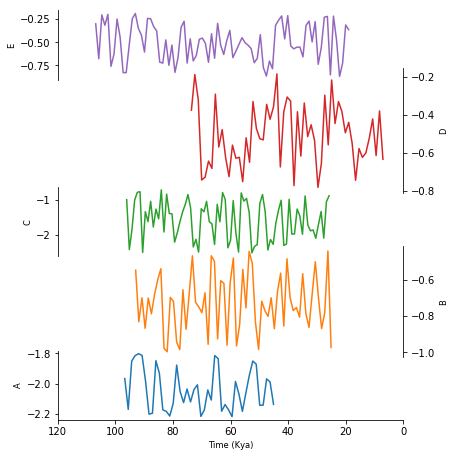

In [32]:
# create a figure
width = 6
panelheight = 1.4
fig = plt.figure(figsize=(width, signals * panelheight))

# create the axes
axs = stacked_axes(fig, 5, squeeze=1.1, topaxis=False, proportions=(1, 1.6, 1, 1.8, 1))

# some labels
labels = 'ABCDE'
# plot the random data!
for i, ax in enumerate(axs):
    ax.plot(data[i]['x'], data[i]['y'], color='C{:}'.format(i))
    # set ylabels
    ax.set_ylabel(labels[i])

    
# note: if you want to change the x axis limits, you need to change it on *all* panels:
for ax in axs:
    ax.invert_xaxis()
    ax.set_xlim(120, 0)
    
axs[0].set_xlabel('Time (Kya)')

Text(0.5,0,'Time (Kya)')

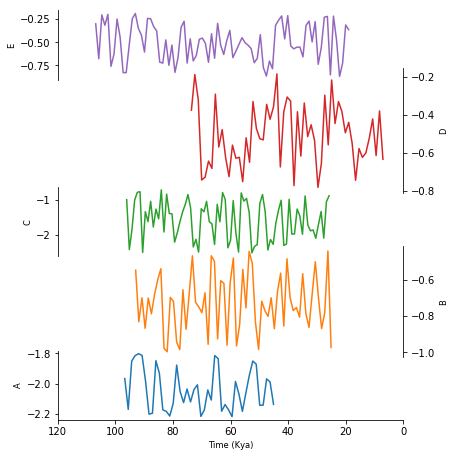

In [34]:
# create a figure
width = 6
panelheight = 1.4
fig = plt.figure(figsize=(width, signals * panelheight))

# create the axes
axs = stacked_axes(fig, 5, squeeze=1.1, topaxis=False, proportions=(1, 1.6, 1, 1.8, 1))

labels = 'ABCDE'

i = 0
ax = axs[i]
ax.plot(data[i]['x'], data[i]['y'], c='C{:}'.format(i))
ax.set_ylabel(labels[i])

i = 1
ax = axs[i]
ax.plot(data[i]['x'], data[i]['y'], c='C{:}'.format(i))
ax.set_ylabel(labels[i])

i = 2
ax = axs[i]
ax.plot(data[i]['x'], data[i]['y'], c='C{:}'.format(i))
ax.set_ylabel(labels[i])

i = 3
ax = axs[i]
ax.plot(data[i]['x'], data[i]['y'], c='C{:}'.format(i))
ax.set_ylabel(labels[i])

i = 4
ax = axs[i]
ax.plot(data[i]['x'], data[i]['y'], c='C{:}'.format(i))
ax.set_ylabel(labels[i])

# note: if you want to change the x axis limits, you need to change it on *all* panels:
for ax in axs:
    ax.invert_xaxis()
    ax.set_xlim(120, 0)
    
axs[0].set_xlabel('Time (Kya)')